In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline
np.random.seed(1)
def skip(row):
    if row == 0: #preserve header
        return False
    return np.random.random() > 0.01
raw = pd.read_csv('DOB_Permit_Issuance.csv', skiprows=skip, header=0)
df = raw.copy()

date_cols = [
'Filing Date',
 'Issuance Date',
 'Expiration Date',
 'Job Start Date'
]
for c in date_cols:
    df[c] = pd.to_datetime(df[c])
    
df['permit_duration'] = (df['Expiration Date'] - df['Issuance Date'])
df['Residential'] = df['Residential'].replace(np.nan, 'NO')

nonna_index = ~df['Zip Code'].isna()
df.loc[nonna_index, 'Zip Code'] = df.loc[nonna_index, 'Zip Code'].astype(int).astype(str)

/home/harinsa/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (33,35,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
def plot_value(df, columns):
    nyc_coord = [40.713, -74.0071]
    map1 = folium.Map(
        width=500,
        height=500,
        location=nyc_coord, zoom_start=12, 
        zoom_control=False,
        tiles='Stamen Toner',)
    folium.Choropleth(geo_data = 'zipcode.geojson',
                      data = df,
                      columns = columns,
                      key_on = 'feature.properties.postalCode',
                      fill_color = 'YlOrRd', 
                      fill_opacity = 0.7, 
                      line_opacity = 0.2,
        ).add_to(map1)
    return map1
    folium.Circle(
        radius=100,
        location=[45.5244, -122.6699],
        popup='The Waterfront',
        color='crimson',
        fill=False,
    ).add_to(m)

In [24]:
nyc_coord = [40.713, -74.0071]
m = folium.Map(
    width=500, height=500,
    location=nyc_coord, zoom_start=12, 
    zoom_control=False,
    tiles='Stamen Toner',)
for i, r in df.iterrows():
    if np.isnan(r.LATITUDE):
        continue
    folium.Circle(
        radius=1,
        location=[r.LATITUDE, r.LONGITUDE],
        color='crimson',
        fill=False,
        fill_opacity=0.3
    ).add_to(m)
    if i > 1000:
        break
m

In [105]:
mta= pd.read_csv('mta_stations.csv')

In [106]:
mta.head()

Station ID  Complex ID GTFS Stop ID Division     Line  \
0           1           1          R01      BMT  Astoria   
1           2           2          R03      BMT  Astoria   
2           3           3          R04      BMT  Astoria   
3           4           4          R05      BMT  Astoria   
4           5           5          R06      BMT  Astoria   

                Stop Name Borough Daytime Routes Structure  GTFS Latitude  \
0  Astoria - Ditmars Blvd       Q            N W  Elevated      40.775036   
1            Astoria Blvd       Q            N W  Elevated      40.770258   
2                   30 Av       Q            N W  Elevated      40.766779   
3                Broadway       Q            N W  Elevated      40.761820   
4                   36 Av       Q            N W  Elevated      40.756804   

   GTFS Longitude  
0      -73.912034  
1      -73.917843  
2      -73.921479  
3      -73.925508  
4      -73.929575

In [107]:
df.BOROUGH.unique()

array(['MANHATTAN', 'STATEN ISLAND', 'BROOKLYN', 'BRONX', 'QUEENS'],
      dtype=object)

In [108]:
mta.Borough.unique()

array(['Q', 'M', 'Bk', 'Bx', 'SI'], dtype=object)

In [111]:
mta = mta.replace({ 'Borough': {'Q': 'QUEENS', 'M': 'MANHATTAN', 'Bk': 'BROOKLYN', 'Bx': "BRONX", 'SI': "STATEN ISLAND"}})
mta.head()

Station ID  Complex ID GTFS Stop ID Division     Line  \
0           1           1          R01      BMT  Astoria   
1           2           2          R03      BMT  Astoria   
2           3           3          R04      BMT  Astoria   
3           4           4          R05      BMT  Astoria   
4           5           5          R06      BMT  Astoria   

                Stop Name Borough Daytime Routes Structure  GTFS Latitude  \
0  Astoria - Ditmars Blvd  QUEENS            N W  Elevated      40.775036   
1            Astoria Blvd  QUEENS            N W  Elevated      40.770258   
2                   30 Av  QUEENS            N W  Elevated      40.766779   
3                Broadway  QUEENS            N W  Elevated      40.761820   
4                   36 Av  QUEENS            N W  Elevated      40.756804   

   GTFS Longitude  
0      -73.912034  
1      -73.917843  
2      -73.921479  
3      -73.925508  
4      -73.929575

In [61]:
line_color = {'1': '#EE352E',
 '2': '#EE352E',
 '3': '#EE352E',
 '4': '#00933C',
 '5': '#00933C',
 '6': '#00933C',
 '7': '#B933AD',
 'A': '#0039A6',
 'B': '#FF6319',
 'C': '#0039A6',
 'D': '#FF6319',
 'E': '#0039A6',
 'F': '#FF6319',
 'FS': '#808183',
 'G': '#6CBE45',
 'GS': '#808183',
 'H': 'black',
 'J': '#996633',
 'L': '#A7A9AC',
 'M': '#FF6319',
 'N': '#FCCC0A',
 'Q': '#FCCC0A',
 'R': '#FCCC0A'
}
nyc_coord = [40.713, -74.0071]
m = folium.Map(
    width=500, height=500,
    location=nyc_coord, zoom_start=12, 
    zoom_control=False,
    tiles='Stamen Toner',)
for i, r in mta.iterrows():
    folium.Circle(
        radius=1,
        location=[r['GTFS Latitude'], r['GTFS Longitude']],
        color='black',#line_color[r.Route_1],
        fill=False,
        fill_opacity=0.3
    ).add_to(m)
m

In [62]:
d = df.groupby('Zip Code').count()[['Lot']].reset_index()
m = folium.Map(
    width=500, height=500,
    location=nyc_coord, zoom_start=12, 
    zoom_control=False,
    tiles='Stamen Toner')

folium.Choropleth(geo_data = 'zipcode.geojson',
      data = d,
      columns = ['Zip Code', 'Lot'],
      key_on = 'feature.properties.postalCode',
      fill_color = 'YlOrRd', 
      fill_opacity = 0.7, 
      line_opacity = 0.2,
).add_to(m)

for i, r in mta.iterrows():
    folium.Circle(
        radius=1,
        location=[r['GTFS Latitude'], r['GTFS Longitude']],
        color='black',#line_color[r.Route_1],
        fill=False,
        fill_opacity=0.3
    ).add_to(m)
m

In [65]:
nyc_coord = [40.713, -74.0071]
m = folium.Map(
    width=500, height=500,
    location=nyc_coord, zoom_start=12, 
    zoom_control=False,
    tiles='Stamen Toner',)
for i, r in df.sample(1000).iterrows():
    if np.isnan(r.LATITUDE):
        continue
    folium.Circle(
        radius=1,
        location=[r.LATITUDE, r.LONGITUDE],
        color='crimson',
        fill=False,
        fill_opacity=0.3
    ).add_to(m)
        
for i, r in mta.iterrows():
    folium.Circle(
        radius=1,
        location=[r['GTFS Latitude'], r['GTFS Longitude']],
        color='blue',#line_color[r.Route_1],
        fill=False,
        fill_opacity=0.3
    ).add_to(m)
m

In [113]:
import geopy.distance

In [126]:
def distance_to_nearest_station(row):
    if np.isnan(row.LATITUDE):
        return np.nan
    min_dist = 10000
    for i, station in mta[mta.Borough == row.BOROUGH].iterrows():
        station_coord = (station['GTFS Latitude'], station['GTFS Longitude'])
        d = geopy.distance.distance((row.LATITUDE, row.LONGITUDE), station_coord).km
        if d < min_dist:
            min_dist = d
    return min_dist

In [127]:
distance_to_nearest_station(df.sample(1).iloc[0])

1.0327506441391037

In [128]:
df['dist_to_mta'] = df.apply(distance_to_nearest_station, axis=1)

In [130]:
df.to_pickle('./data.p')

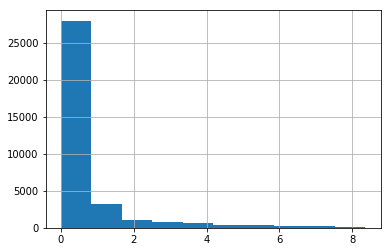

In [131]:
df.dist_to_mta.hist()

In [133]:
np.sum(df.dist_to_mta < 0.5)

23250

In [134]:
df.shape

(34975, 63)

In [135]:
nyc_coord = [40.713, -74.0071]
m = folium.Map(
    width=500, height=500,
    location=nyc_coord, zoom_start=12, 
    zoom_control=False,
    tiles='Stamen Toner',)
for i, r in df.sample(1000).iterrows():
    if np.isnan(r.LATITUDE):
        continue
    if r.dist_to_mta < 0.5:
        c = 'red'
    else:
        c='green'
    
    folium.Circle(
        radius=1,
        location=[r.LATITUDE, r.LONGITUDE],
        color=c,
        fill=False,
        fill_opacity=0.3
    ).add_to(m)
        
for i, r in mta.iterrows():
    folium.Circle(
        radius=1,
        location=[r['GTFS Latitude'], r['GTFS Longitude']],
        color='blue',#line_color[r.Route_1],
        fill=False,
        fill_opacity=0.3
    ).add_to(m)
m

In [148]:
d = df.groupby([df.dist_to_mta < 0.5, df['Issuance Date'].dt.year]).count()[['Lot']].unstack()['Lot'].T
d

dist_to_mta    False  True 
Issuance Date              
1989.0            21     11
1990.0            78    177
1991.0           123    360
1992.0           130    408
1993.0           171    371
1994.0           196    438
1995.0           210    429
1996.0           209    479
1997.0           222    522
1998.0           253    565
1999.0           298    597
2000.0           347    663
2001.0           402    663
2002.0           406    723
2003.0           427    730
2004.0           545    857
2005.0           611    923
2006.0           656    951
2007.0           564   1061
2008.0           460    992
2009.0           474    896
2010.0           480    864
2011.0           457    940
2012.0           439   1093
2013.0           502   1103
2014.0           500   1170
2015.0           592   1213
2016.0           601   1268
2017.0           591   1284
2018.0           566   1097
2019.0           136    247

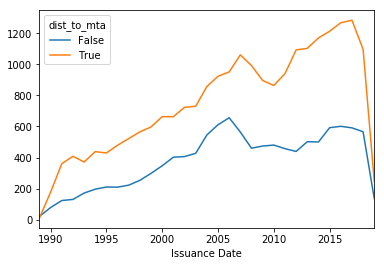

In [150]:
d.plot();